## **Pregunta 2: Distribución del PBI**

Cargue la información del PBI en millones de soles y con frecuencia trimestral desde el BCRP (en el periodo 2005Q1 hasta 2020Q4) y calcule:

• Seleccione la submuestra de 2005Q1 hasta 2018Q4 y calcule el promedio, desvió estándar, asimetría y curtosis. Luego seleccione el periodo 2019Q1 hasta 2020Q4 y calcule el promedio, desvió estándar, asimetría y curtosis. Exporte el comparativo de los estadísticos en un Excel.

• Evalué la prueba de raíz unitaria Dickey Fuller Aumentado sobre el periodo 2005Q1 y 2018Q4. ¿La serie tiene raíz unitaria?

• Realice un test de normalidad y concluya respecto de su distribución del crecimiento anualizado del PBI. ¿Es normalmente distribuido?

• Evalué la prueba de raíz unitaria Dickey Fuller Aumentado sobre el crecimiento anualizado del PBI. ¿La serie tiene raíz unitaria?




In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera
import warnings
warnings.filterwarnings("ignore")

In [78]:
# Traer los datos desde la API del BCRP del Perú
codigo_de_serie = "PN02550AQ"
formato_de_salida = "json"
periodo_inicial = "2004T1"
periodo_final = "2020T4"
idioma = "esp"
response = requests.get(f"https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigo_de_serie}/{formato_de_salida}/{periodo_inicial}/{periodo_final}/{idioma}")
data = pd.DataFrame(response.json()["periods"])

In [79]:
# Transformar la columna "values" en una columna llamada "data"
data["data"] = [float(data[0]) for data in data["values"]]
data.drop(columns=["values"], inplace=True)

In [80]:
data.dtypes

name     object
data    float64
dtype: object

In [81]:
data

,name,data
0,T1.05,56365.016152
1,T2.05,63968.254350
2,T3.05,59665.082572
3,T4.05,64653.247189
4,T1.06,65462.008468
...,...,...
59,T4.19,209368.162095
60,T1.20,180031.361332
61,T2.20,142459.637237
62,T3.20,191285.843147


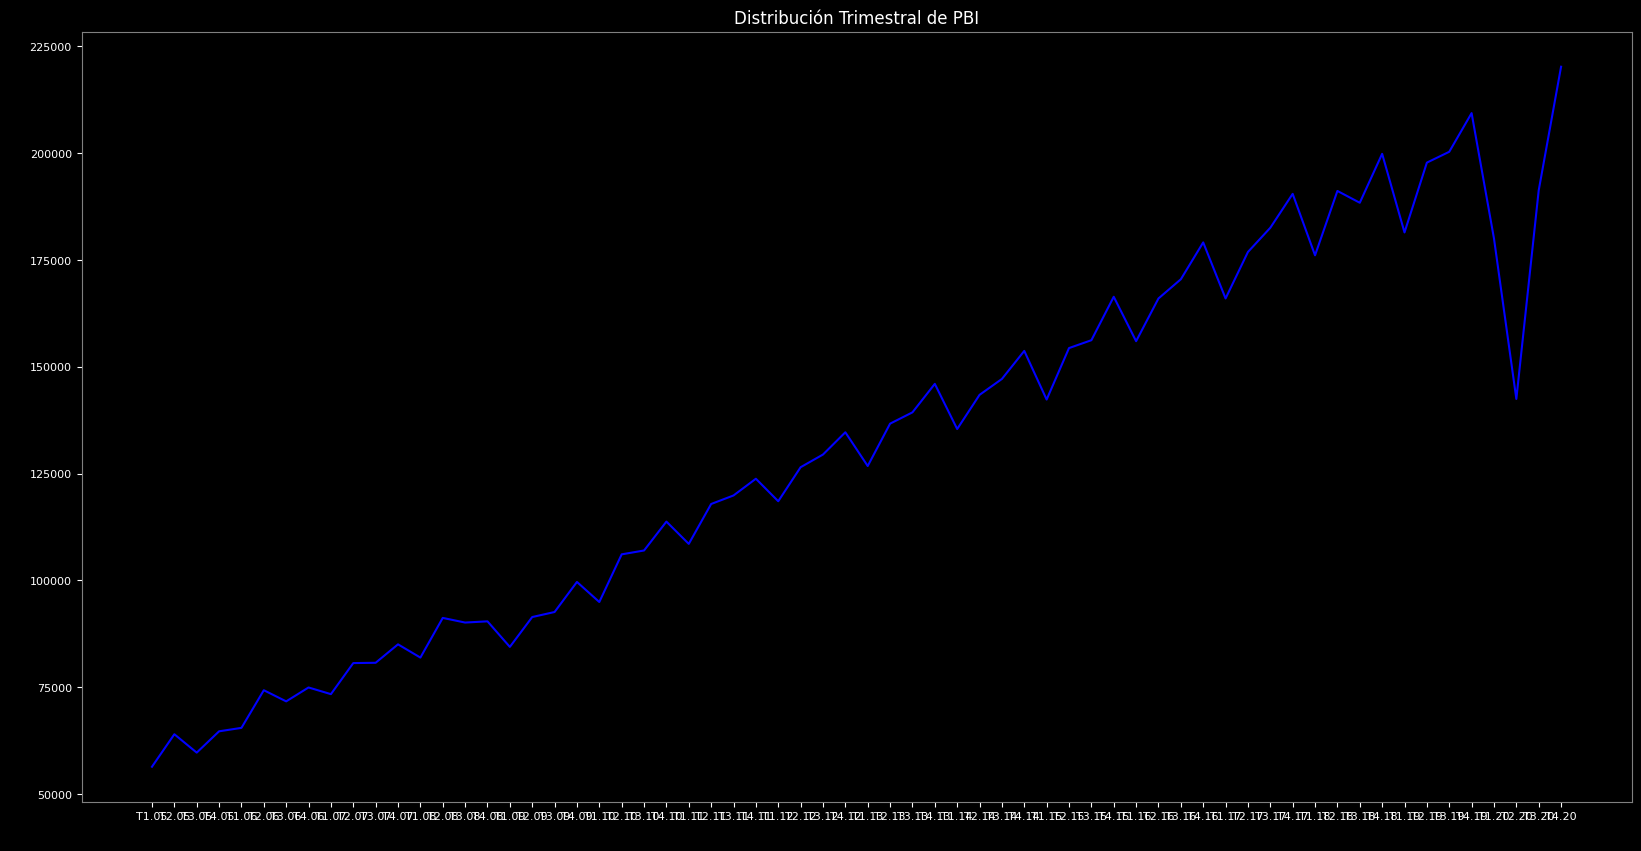

In [82]:
fig, ax = plt.subplots(figsize=(20, 10), facecolor="black")
ax.plot(data["name"], round(data["data"], 2), color="blue", label="Ingreso promedio")
ax.set_title("Histograma de ingresos promedios")
ax.set_facecolor("black")
ax.set_xlabel('Trimestre')
ax.set_ylabel('PBI')
ax.set_title('Distribución Trimestral de PBI')
ax.tick_params(color="white")
ax.tick_params(axis="x", labelcolor="white", labelsize=8)
ax.tick_params(axis="y", labelcolor="white", labelsize=8)
ax.title.set_color("white")
for spine in ax.spines.values():
    spine.set_edgecolor("gray")
plt.show()

In [83]:
# Seleccionar primera y segunda muestra para calcular los estadísticos
sample_one = data.iloc[:56]
sample_two = data.iloc[56:]

# Media y desviación estándar de cada muestra
print("########################")
print("Media y desviación estándar de cada muestra")
print("Primera muestra")
print(sample_one.describe())
print("Segunda muestra")
print(sample_two.describe())
print("########################")
print("\n")

# Asimetría y Curtosis
print("Asimetría y Curtosis")
print("Primera muestra")
print(sample_one["data"].skew())
print(sample_one["data"].kurt())
print("########################")
print("\n")

print("Segunda muestra")
print(sample_two["data"].skew())
print(sample_two["data"].kurt())

########################
Media y desviación estándar de cada muestra
Primera muestra
                data
count      56.000000
mean   122565.716684
std     40538.751751
min     56365.016152
25%     88838.385976
50%    121821.063062
75%    154769.191014
max    199839.025983
Segunda muestra
                data
count       8.000000
mean   190363.483449
std     23571.330523
min    142459.637237
25%    181086.311874
50%    194532.722920
75%    202578.846790
max    220229.557349
########################


Asimetría y Curtosis
Primera muestra
0.1493697592702661
-1.1419034055865178
########################


Segunda muestra
-1.1176346106309578
2.0112006692347366


**Aplicación de la Prueba Dickey-Fuller Aumentada**

Una serie temporal es estacionario si no tiene tendencia, presenta una varianza constante a lo largo de tiempo y tiene una estructura de correlación constante a lo largo de tiempo.

$$
H_O: \text{La serie temporal tiene raiz unitaria, es decir, no es estacionaria} \\
H_1: \text{La serie temporal no tiene raiz unitaria, es decir, es estacionaria}
$$

In [84]:
# Análisis de la prueba Dickey-Fuller en la primera muestra
adf_test = adfuller(sample_one["data"], autolag="AIC", regression="c")
print(f"Estadístico de Dickey-Fuller: {adf_test[0]:.2f}")
print(f"p_value de Dickey-Fuller: {adf_test[1]}")
print(f"Criterio de significación de Dickey-Fuller: {adf_test[4]}")
print(f"Número de lags usados: {adf_test[2]}")
print(f"Número de observaciones: {adf_test[3]}")

print("\n")

adf_test = adfuller(sample_one["data"], autolag="AIC", regression="ct")
print(f"Estadístico de Dickey-Fuller: {adf_test[0]:.2f}")
print(f"p_value de Dickey-Fuller: {adf_test[1]}")
print(f"Criterio de significación de Dickey-Fuller: {adf_test[4]}")
print(f"Número de lags usados: {adf_test[2]}")
print(f"Número de observaciones: {adf_test[3]}")

Estadístico de Dickey-Fuller: 1.37
p_value de Dickey-Fuller: 0.9969554047768819
Criterio de significación de Dickey-Fuller: {'1%': np.float64(-3.5745892596209488), '5%': np.float64(-2.9239543084490744), '10%': np.float64(-2.6000391840277777)}
Número de lags usados: 7
Número de observaciones: 48


Estadístico de Dickey-Fuller: -2.08
p_value de Dickey-Fuller: 0.5595237788371844
Criterio de significación de Dickey-Fuller: {'1%': np.float64(-4.170389571381606), '5%': np.float64(-3.51066995808334), '10%': np.float64(-3.18534353579354)}
Número de lags usados: 9
Número de observaciones: 46


**Calcular el crecimiento anualizado del PBI**

$$
t = (\frac{y_t}{y_{t-4}})^1 -1
$$

In [85]:
sample_one["Crecimiento anualizado"] = sample_one["data"].pct_change(4)
sample_one

,name,data,Crecimiento anualizado
0,T1.05,56365.016152,NaN
1,T2.05,63968.254350,NaN
2,T3.05,59665.082572,NaN
3,T4.05,64653.247189,NaN
4,T1.06,65462.008468,0.161394
5,T2.06,74272.236033,0.161080
6,T3.06,71663.306079,0.201093
7,T4.06,74916.533160,0.158744
8,T1.07,73354.118000,0.120560
9,T2.07,80625.953000,0.085546


Utilizaré la prueba de **Jarque-Bera** para detectar la normalidad del crecimiento anualizado, puedo utilizar la prueba de Shapiro-Wilk, sin embargo, la prueba elegida tiene una aplicación más común en series económicas.

$$
H_0: \text{La serie tiene una distribución normal.} \\
H_1: \text{La serie no tiene una distribución normal.}
$$

In [86]:
jb_stat, jb_pvalue = jarque_bera(sample_one["Crecimiento anualizado"].dropna())

print(f"Estadístico de Jarque-Bera: {jb_stat}")
print(f"p-valor: {jb_pvalue}")

if jb_pvalue < 0.05:
    print("El valor de Jarque-Bera es significativo. Se rechaza la hipótesis nula.")
else:
    print("El valor de Jarque-Bera no es significativo. No se puede rechazar la hipótesis nula.")

Estadístico de Jarque-Bera: 1.8353642636157932
p-valor: 0.3994438270457381
El valor de Jarque-Bera no es significativo. No se puede rechazar la hipótesis nula.


In [88]:
# Análisis de la prueba Dickey-Fuller del crecimiento anualizado de la serie
adf_test = adfuller(sample_one["Crecimiento anualizado"].dropna(), autolag="AIC", regression="c")
print(f"Estadístico de Dickey-Fuller: {adf_test[0]:.2f}")
print(f"p_value de Dickey-Fuller: {adf_test[1]}")
print(f"Criterio de significación de Dickey-Fuller: {adf_test[4]}")
print(f"Número de lags usados: {adf_test[2]}")
print(f"Número de observaciones: {adf_test[3]}")

print("\n")

adf_test = adfuller(sample_one["Crecimiento anualizado"].dropna(), autolag="AIC", regression="ct")
print(f"Estadístico de Dickey-Fuller: {adf_test[0]:.2f}")
print(f"p_value de Dickey-Fuller: {adf_test[1]}")
print(f"Criterio de significación de Dickey-Fuller: {adf_test[4]}")
print(f"Número de lags usados: {adf_test[2]}")
print(f"Número de observaciones: {adf_test[3]}")

Estadístico de Dickey-Fuller: -0.67
p_value de Dickey-Fuller: 0.8551120202936864
Criterio de significación de Dickey-Fuller: {'1%': np.float64(-3.6055648906249997), '5%': np.float64(-2.937069375), '10%': np.float64(-2.606985625)}
Número de lags usados: 11
Número de observaciones: 40


Estadístico de Dickey-Fuller: -4.01
p_value de Dickey-Fuller: 0.008571437863695158
Criterio de significación de Dickey-Fuller: {'1%': np.float64(-4.1922463983371125), '5%': np.float64(-3.520758216175359), '10%': np.float64(-3.1911390346614836)}
Número de lags usados: 9
Número de observaciones: 42


El análisis del crecimiento anualizado del PBI muestra que, bajo la especificación con solo constante en la prueba Dickey-Fuller aumentada, el $p_{values}$ es de 0.85, lo que no permite rechazar la hipótesis nula de raíz unitaria. Esto sugiere que la serie no es estacionaria bajo dicha especificación.

Sin embargo, al incluir una constante y una tendencia determinista en la regresión, el $p_{value}$ baja a 0.008, permitiendo rechazar la hipótesis nula de raíz unitaria. En consecuencia, se concluye que el crecimiento anualizado del PBI es estacionario entorno a una tendencia determinista y que si se realiza un análisis econométrico de serie ARIMA, debería agregarse la tendencia determinista.

Esta diferencia se debe a que la inclusión de la tendencia permite modelar el comportamiento sistemático de largo plazo de la serie, que puede reflejar el crecimiento estructural de la economía.

Por otro lado, al analizar el test de normalidad de Jarque-Bera, se encuentra evidencia estadística para rechazar la hipótesis de normalidad. Esto indica que el crecimiento anualizado no sigue una distribución normal, lo que sugiere que debe ser tomado en cuenta en las aplicaciones econométricas que requieran supuestos fuertes sobre la distribución de los errores.